In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [32]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalized pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0


train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# class names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
#CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history =model.fit(train_images, train_labels, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7588 - loss: 0.6646 - val_accuracy: 0.8721 - val_loss: 0.3562
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8808 - loss: 0.3350 - val_accuracy: 0.8817 - val_loss: 0.3211
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8987 - loss: 0.2753 - val_accuracy: 0.9000 - val_loss: 0.2721
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9120 - loss: 0.2370 - val_accuracy: 0.9013 - val_loss: 0.2703
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9223 - loss: 0.2136 - val_accuracy: 0.9055 - val_loss: 0.2542
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9288 - loss: 0.1910 - val_accuracy: 0.9124 - val_loss: 0.2509
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9399 - loss: 0.1627 - val_accuracy: 0.9083 - val_loss: 0.2630
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9465 - loss: 0.1451 - 

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest Loss: {test_loss:.4f}')

313/313 - 1s - 2ms/step - accuracy: 0.9081 - loss: 0.8871

Test accuracy: 0.9081000089645386

Test Loss: 0.8871


In [36]:
#Predictions
predictions = model.predict(test_images)
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = test_labels[i]
    print(f'Predicted class for image {i}  :{class_names[predicted_class]}')
    print(f'True class for image {i} :{class_names[true_class]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class for image 0  :Ankle boot
True class for image 0 :Ankle boot
Predicted class for image 1  :Pullover
True class for image 1 :Pullover
Predicted class for image 2  :Trouser
True class for image 2 :Trouser
Predicted class for image 3  :Trouser
True class for image 3 :Trouser
Predicted class for image 4  :Shirt
True class for image 4 :Shirt
Predicted class for image 5  :Trouser
True class for image 5 :Trouser
Predicted class for image 6  :Coat
True class for image 6 :Coat
Predicted class for image 7  :Shirt
True class for image 7 :Shirt
Predicted class for image 8  :Sandal
True class for image 8 :Sandal
Predicted class for image 9  :Sneaker
True class for image 9 :Sneaker


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

In [38]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_labels.flatten()

cm = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Confusion Matrix:
[[881   1  12  13   2   1  80   0  10   0]
 [  5 976   1  10   3   0   3   0   2   0]
 [ 20   1 843  10  51   0  73   0   2   0]
 [ 26   3   6 900  23   0  38   0   3   1]
 [  2   1  47  20 851   0  78   0   1   0]
 [  0   0   0   0   0 972   0  25   1   2]
 [133   0  42  22  49   0 749   0   5   0]
 [  0   0   0   0   0   8   0 977   0  15]
 [  7   1   4   4   0   3   5   2 974   0]
 [  1   0   0   1   0   5   0  35   0 958]]


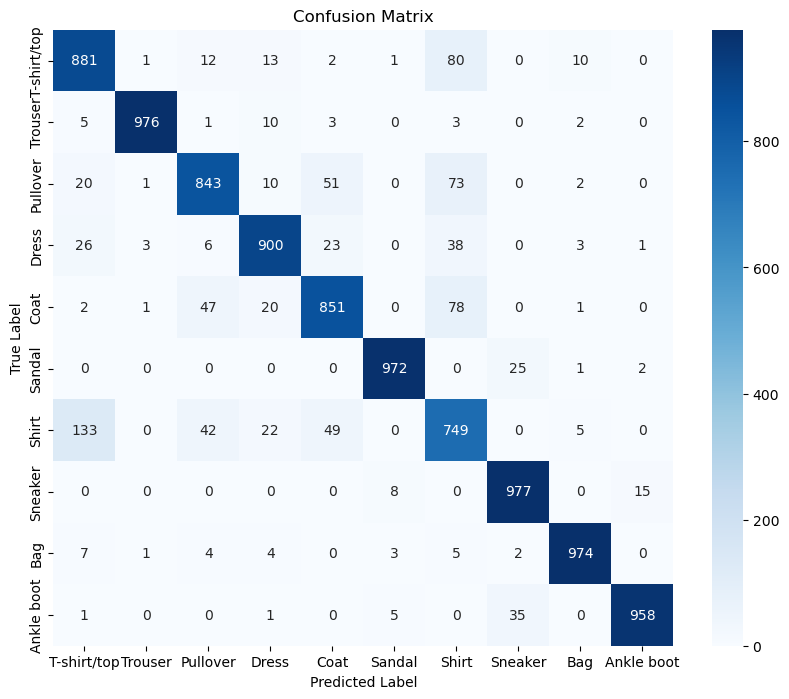

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.88      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.87      0.85      0.86      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.73      0.75      0.74      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



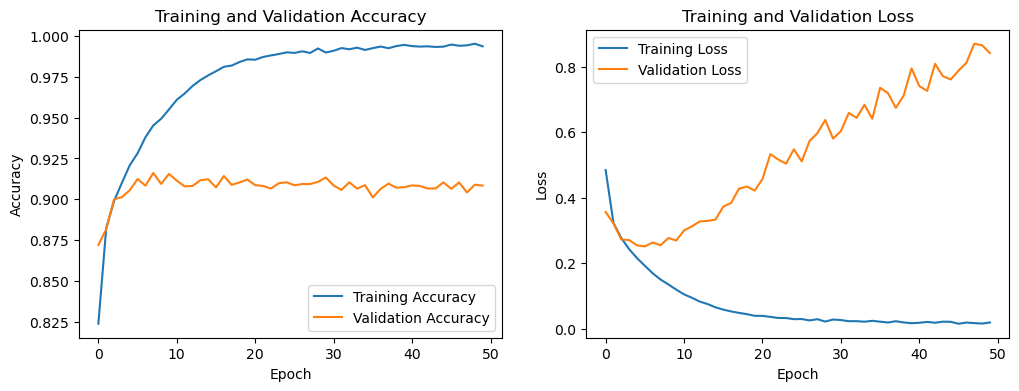

In [41]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()